# Forecasting Energy Production 1

Step 1. The goal here is to see what we are working with and try find any peculiarities with the data that may spring up later.

I am already keen to build an LSTM model, haven't done it before but I have read a fair bit about it and I know it's the go to for this kind of forecasting.But before we get there I would just like to get a general sense for what data we have and how it behaves. 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

import fsspec

fs = fsspec.filesystem("")

In [2]:
files = fs.glob('data/*.csv')
files

['/Users/petermarsh/Documents/g7_test/03_Forecast_Energy_Production/data/Recruitment Dataset.csv',
 '/Users/petermarsh/Documents/g7_test/03_Forecast_Energy_Production/data/forecast_data_cleaned.csv',
 '/Users/petermarsh/Documents/g7_test/03_Forecast_Energy_Production/data/forecast_data_cleaned_feature_engineered.csv',
 '/Users/petermarsh/Documents/g7_test/03_Forecast_Energy_Production/data/forecast_data_cleaned_feature_engineered_with_prediction_train_on_end.csv',
 '/Users/petermarsh/Documents/g7_test/03_Forecast_Energy_Production/data/forecast_data_cleaned_feature_engineered_with_prediction_train_on_start.csv']

What variables have we got?

In [3]:
df = pd.read_csv(files[0])
list(df)

['date',
 'temperature_2m',
 'relative_humidity_2m',
 'apparent_temperature',
 'precipitation',
 'rain',
 'cloud_cover',
 'cloud_cover_low',
 'cloud_cover_mid',
 'cloud_cover_high',
 'wind_speed_10m',
 'wind_speed_100m',
 'wind_direction_10m',
 'wind_direction_100m',
 'wind_gusts_10m',
 'shortwave_radiation',
 'direct_radiation',
 'diffuse_radiation',
 'direct_normal_irradiance',
 'direct_normal_irradiance_instant',
 'power_x']

A quick look at the data types and formats:

In [4]:
df

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,...,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,direct_normal_irradiance_instant,power_x
0,2017-01-01 02:00:00,19.130999,34.823170,15.252626,0.0,0.0,0.0,0.0,0.0,0.0,...,8.099383,131.308520,122.905240,NaN,0.0,0.0,0.0,0.00000,0.000000,1931.490945
1,2017-01-01 03:00:00,19.181000,32.453570,15.554827,0.0,0.0,0.0,0.0,0.0,0.0,...,7.379024,125.909810,116.564990,NaN,0.0,0.0,0.0,0.00000,0.000000,1847.392640
2,2017-01-01 04:00:00,18.681000,33.363396,15.538769,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140033,119.475800,106.073650,NaN,0.0,0.0,0.0,0.00000,0.000000,1279.030366
3,2017-01-01 05:00:00,17.380999,36.462326,14.464083,0.0,0.0,0.0,0.0,0.0,0.0,...,4.210700,110.854546,94.085540,NaN,0.0,0.0,0.0,0.00000,0.000000,1499.429919
4,2017-01-01 06:00:00,18.230999,35.558502,15.717966,0.0,0.0,0.0,0.0,0.0,0.0,...,2.860070,21.801476,36.469334,NaN,7.0,3.0,4.0,42.41746,20.247917,386.209862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,2017-04-15 20:00:00,13.531000,44.875070,9.151058,0.0,0.0,0.0,0.0,0.0,0.0,...,9.042676,104.322760,100.191444,NaN,0.0,0.0,0.0,0.00000,0.000000,4593.790445
2515,2017-04-15 21:00:00,12.831000,47.140370,8.597698,0.0,0.0,0.0,0.0,0.0,0.0,...,8.864535,106.460100,101.056370,NaN,0.0,0.0,0.0,0.00000,0.000000,4232.933909
2516,2017-04-15 22:00:00,12.281000,48.523396,7.980062,0.0,0.0,0.0,0.0,0.0,0.0,...,9.025519,106.113490,99.566620,NaN,0.0,0.0,0.0,0.00000,0.000000,4450.522698
2517,2017-04-15 23:00:00,11.731000,50.493214,7.573540,0.0,0.0,0.0,0.0,0.0,0.0,...,8.910667,108.435040,99.039406,NaN,0.0,0.0,0.0,0.00000,0.000000,5007.694212


Quick look at the missingness and for any obvious mistakes:

In [5]:
df.describe()

,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,direct_normal_irradiance_instant,power_x
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,0.0,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000
mean,22.016153,41.832577,19.382191,0.011116,0.011116,10.033823,4.453751,4.497817,11.514490,4.245069,6.284718,185.998130,196.113356,NaN,305.364033,256.563716,48.800318,397.692544,115.485941,2251.140989
std,6.520026,22.319131,6.733989,0.106629,0.106629,19.537185,15.983490,13.870440,26.552728,2.004128,2.849950,98.763264,99.141467,NaN,372.784652,327.729606,58.685402,419.341145,144.470371,1852.310128
min,5.331000,4.062007,1.271329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.223607,1.507400,0.734510,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.831000,22.287453,14.240500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.531798,4.044750,119.906645,121.125005,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,466.793589
50%,21.431000,38.190334,18.925034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.103657,6.328507,150.852020,159.928390,NaN,52.000000,25.000000,20.000000,192.043580,42.850000,1779.690108
75%,27.056000,61.483740,24.486121,0.000000,0.000000,10.950000,0.000000,0.000000,0.000000,5.810765,8.537857,282.311765,297.386915,NaN,645.000000,528.500000,92.000000,857.772250,203.779100,4364.301055
max,38.931000,97.363190,36.702984,2.000000,2.000000,100.000000,100.000000,100.000000,100.000000,9.676776,13.408206,360.000000,360.000000,NaN,1126.000000,1017.000000,422.000000,1052.685200,480.323550,5483.429632


Just the one! Wind Gust is always null....

In [6]:
df['wind_gusts_10m'].dropna()
df = df.drop(columns=['wind_gusts_10m'])

Create a date time index:

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

And just add in the 6 hour future power values as a visual reference. I'll do the feature engineering at another stage. 

In [8]:
df['power_x_6hour_future'] = df['power_x'].shift(-6)

I'm a big fan of making sure to visualise the data before trying to model it. Below is an interactive plot to view the power output against any other variable over each week in the dataset. Making these interactive plots used to be a nightmare but thankfully chatgpt is pretty good at it. 

In [9]:
# Create a week selector
start_date = df.index.min()
end_date = df.index.max()
week_selector = widgets.SelectionSlider(
    options=pd.date_range(start_date, end_date, freq='W').strftime('%Y-%m-%d'),
    description='Select Week:',
    continuous_update=False
)

# Create a second variable selector
variable_selector = widgets.Dropdown(
    options=[col for col in df.columns if col != 'power_x'],
    description='Second Variable:',
    disabled=False
)

def plot_weekly_data(selected_week, second_variable):
    selected_week = pd.to_datetime(selected_week)
    week_start = selected_week - pd.Timedelta(days=selected_week.weekday())
    week_end = week_start + pd.Timedelta(days=6)
    df_week = df.loc[week_start:week_end]
    
    fig = go.Figure()
    
    # Add primary y-axis for power_x
    fig.add_trace(go.Scatter(x=df_week.index, y=df_week['power_x'],
                             mode='lines+markers',
                             name='Energy Production',
                             yaxis='y1'))
    
    # Add secondary y-axis for selected variable
    if second_variable:
        fig.add_trace(go.Scatter(x=df_week.index, y=df_week[second_variable],
                                 mode='lines',
                                 name=second_variable,
                                 yaxis='y2'))

        yaxis2_config = dict(title=second_variable, side='right', overlaying='y', showgrid=False)
        
        # If the selected variable contains 'direction', set range to [0, 360]
        if 'direction' in second_variable.lower():
            yaxis2_config['range'] = [0, 360]
        
        fig.update_layout(yaxis2=yaxis2_config)
    
    fig.update_layout(
        title=f'Energy Production & {second_variable} for {week_start.date()} - {week_end.date()}',
        xaxis=dict(title='Date/Time'),
        yaxis=dict(title='Energy Production (kW)', side='left', showgrid=False),
        yaxis2=dict(title=second_variable, side='right', overlaying='y', showgrid=False)
    )
    
    fig.show()

interactive_plot = widgets.interactive_output(plot_weekly_data, {'selected_week': week_selector, 'second_variable': variable_selector})
display(widgets.VBox([week_selector, variable_selector, interactive_plot]))

Some findings from playing with the interactive widget:

1) 'precipitation', 'rain' are duplicates of the same data 

In [10]:
#df[['precipitation', 'rain']].describe()
df = df.drop(columns=['precipitation'])

2) the difference between  'direct_normal_irradiance' and 'direct_normal_irradiance_instant' is larger than I would've thought. I presume one is averaged over the hour. Makes sense on a partly cloudy day I guess. Not sure forecasting instant is realistic over a 6 hour period. Will drop now.

In [11]:
#df[['direct_normal_irradiance', 'direct_normal_irradiance_instant']].describe()
df = df.drop(columns=['direct_normal_irradiance_instant'])

3) Similarly 'shortwave_radiation' and 'direct_radiation' are almost identical I will drop shortwave. direct_radiation is a bit easier to grasp

In [12]:
#df[['shortwave_radiation', 'direct_radiation']].describe()
df = df.drop(columns=['shortwave_radiation'])

4) Other notes that may be useful later. Wind direction variance is high at low wind speed (obviously I guess), cloud cover low, medium and high seem like they may be usefull. I think total cloud cover can then be dropped as it is just the sum of these two. Maybe create low cloud and other_cloud for simplicity., although high cloud cover can be a good weather predictor. Irradiance seems like it could be usefull to capture air density/fog. Apparent temperature is a direct calculation of humidty and air temp so dropping seems reasonable. 

Let's check correlations:

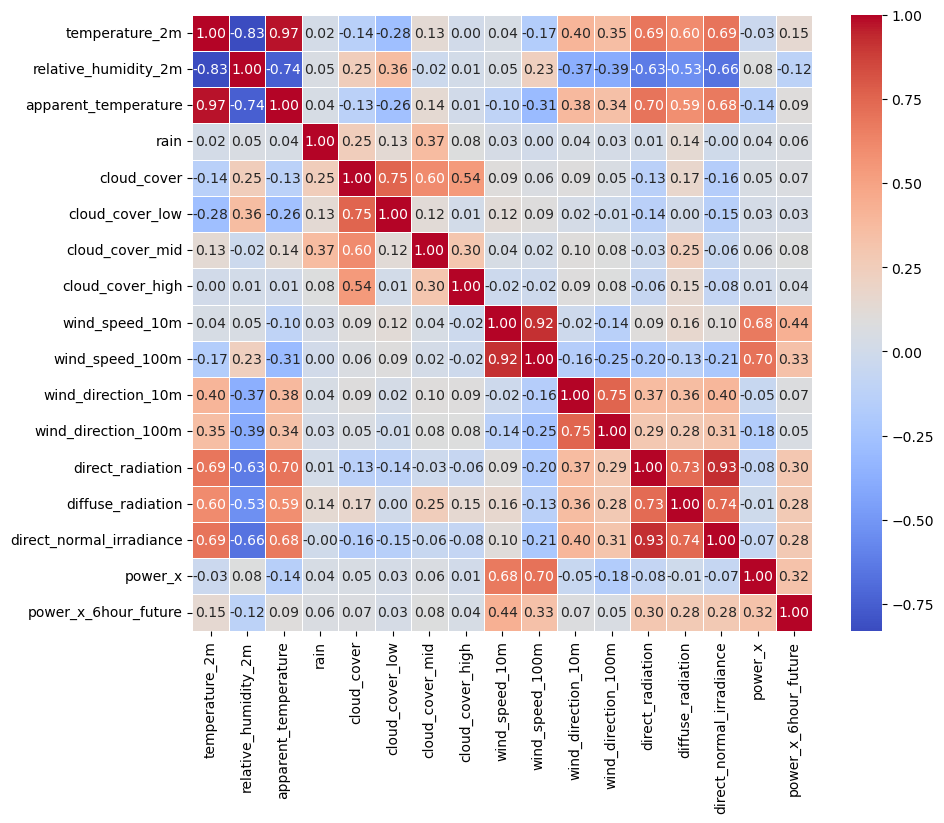

In [13]:
corr = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Would've expected more correlation from wind direction and power, but still useful correlation with wind speed. Also good correlation with low cloud cover and wind speed which is usefull. 

Direction normal irradiance is probably not very helpful with both direct and diffuse radiation present. Interesting that they have a high correlation with future power.

I'm going to drop [ (total_)cloud_cover, Apparent temperature, direct_normal_irradiance ] to just simplify things  **might** add them back later

In [14]:
df = df.drop(columns = ['apparent_temperature','cloud_cover', 'direct_normal_irradiance'])

Double check no missing data:

In [15]:
len(df) == len(df.dropna(how = 'any'))

False

Lastly the goal is to predict 6 hours in the future so a feature with high correlation to power_x and also high autocorrelation is usefull to test we can check the correlations with time of day

In [16]:
df['TOD'] = [x.time().hour for x in df.index]
df['TOD_sin'] = np.sin(2 * np.pi * df['TOD'] / 24)
df['TOD_cos'] = np.cos(2 * np.pi * df['TOD'] / 24)

And Day of year for interest sake, but will drop from model as with only 4 months this will almost definitely lead to over fitting / leaking

In [17]:
df['DOY'] = [x.dayofyear for x in df.index]
df['DOY_sin'] = np.sin(2 * np.pi * df['DOY'] / 365)
df['DOY_cos'] = np.cos(2 * np.pi * df['DOY'] / 365)

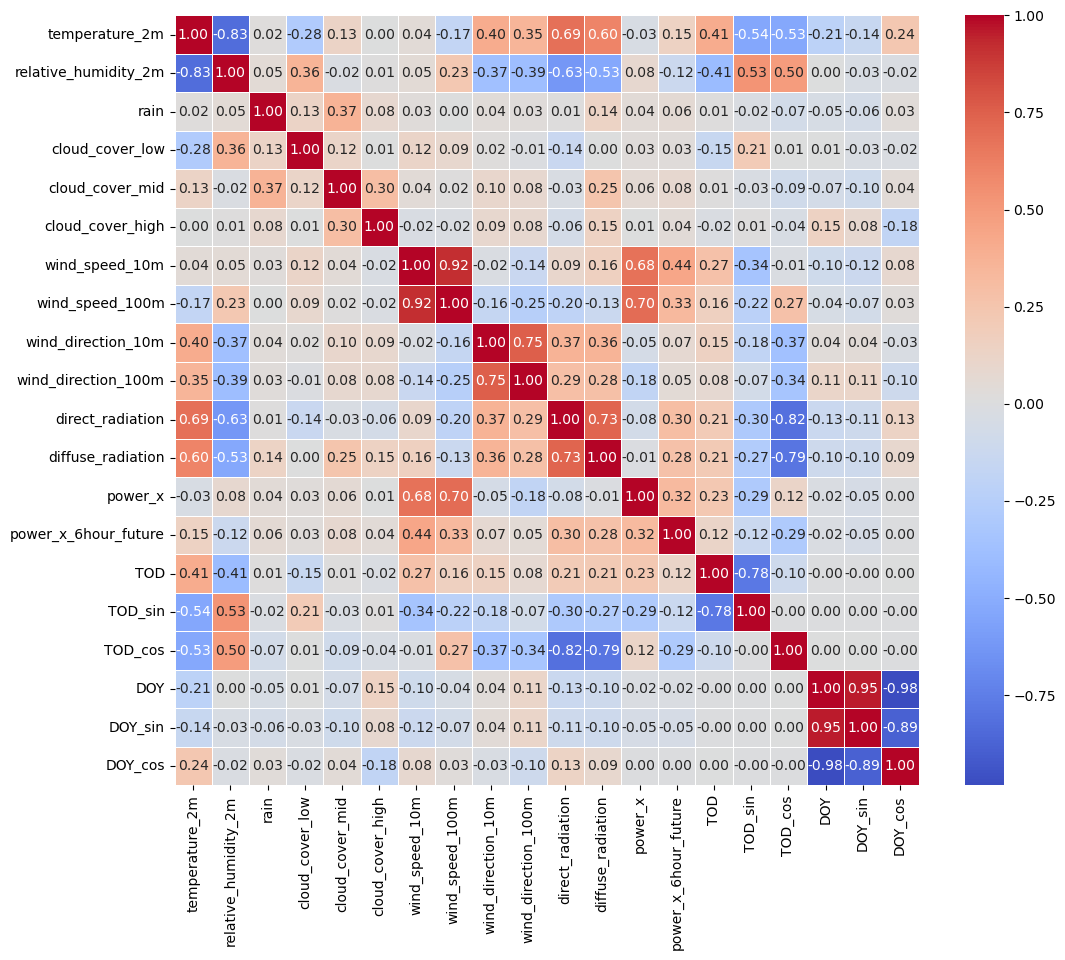

In [18]:
corr = df.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [19]:
df = df.drop(columns = ['power_x_6hour_future'])
df = df.drop(columns = ['DOY', 'DOY_sin', 'DOY_cos'])

** I later came back here and did the below:

A quick look to see if we are experiencing any out of distribution events in the testing and validation set compared to the training set as the model is not generalising well.  

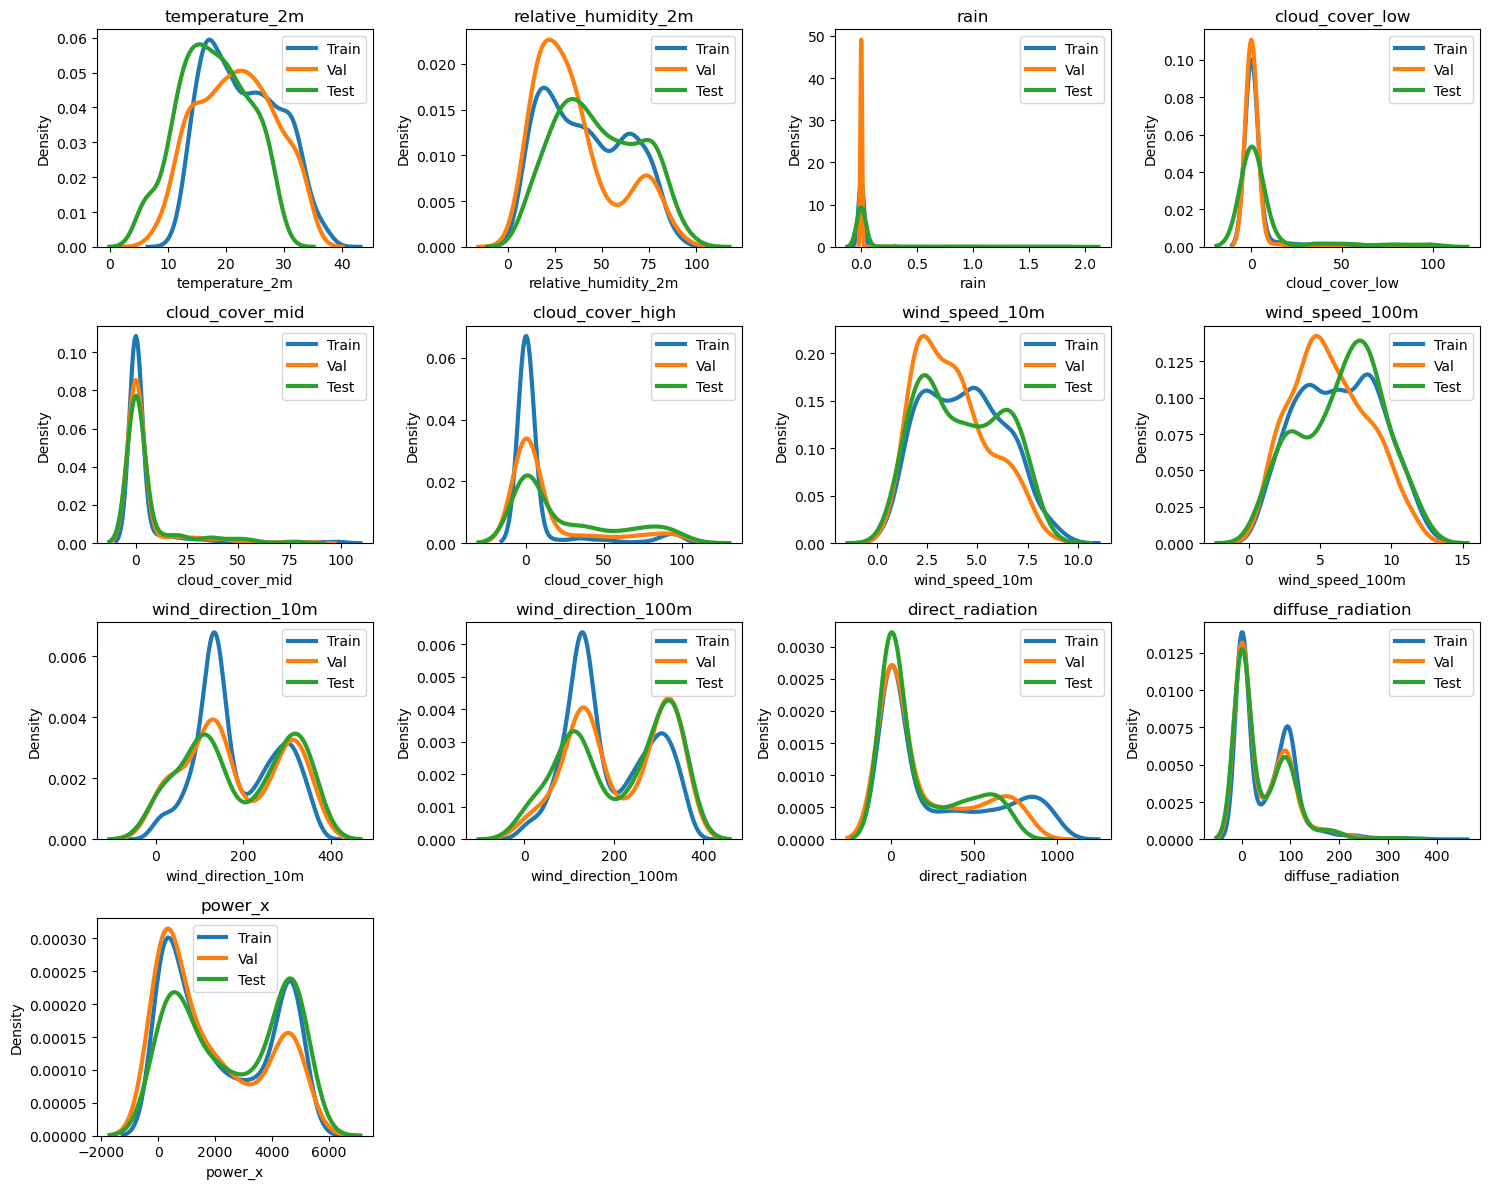

In [20]:
# Define the split indices
n = len(df)
split1 = int(0.7 * n)
split2 = int(0.85 * n)


variables = [x for x in df.columns if x not in ['date', 'TOD', 'TOD_sin', 'TOD_cos']]

# Determine the grid size
n_cols = 4
n_rows = int(np.ceil(len(variables) / n_cols))


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]

    # Plot distributions
    sns.kdeplot(df.iloc[:split1][var], label="Train", ax=ax, lw = 3)
    sns.kdeplot(df.iloc[split1:split2][var], label="Val", ax=ax, lw = 3)
    sns.kdeplot(df.iloc[split2:][var], label="Test", ax=ax, lw = 3)

    ax.set_title(var)
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

hmm nothing too extreme here, other than Val being over a very dry period and both Val and Test having a reasonable number of NE surface winds which don't occur in the training set - which seems to be mostly Southerly. Val is significantly less windy than train, whilst test is more windy - this is reflected in the validation data. It can get quite complex to extract test and val from anywhere other than the ends in our LSTM model as we will lose 30 hours of data to spin up each time (24 hours memory + 6 hours forecast validation). One simple trick could be to test and val on the start of the dataset rather than the end. 



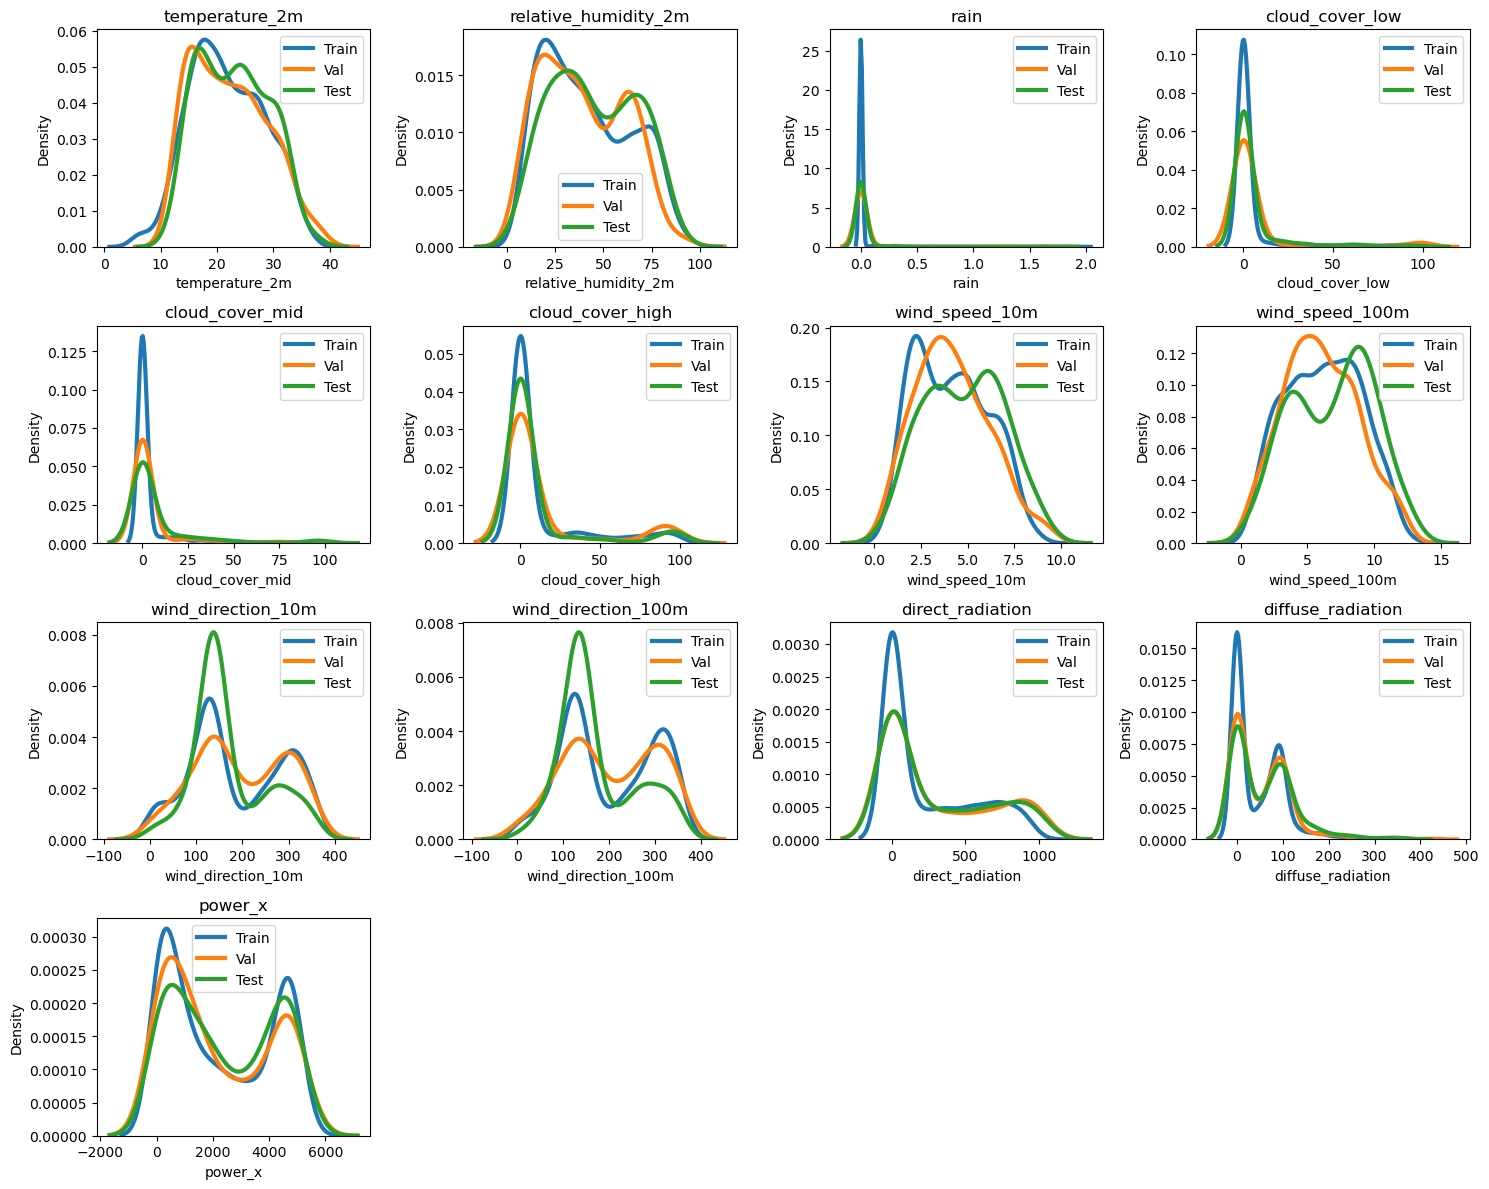

In [21]:
split1 = int(0.15 * n)  # First 15% for Test
split2 = int(0.30 * n)  # Next 15% for Val

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]

    # Plot distributions
    sns.kdeplot(df.iloc[split2:][var], label="Train", ax=ax, lw=3)
    sns.kdeplot(df.iloc[split1:split2][var], label="Val", ax=ax, lw=3)
    sns.kdeplot(df.iloc[:split1][var], label="Test", ax=ax, lw=3)

    ax.set_title(var)
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Or maybe from the ends rather:

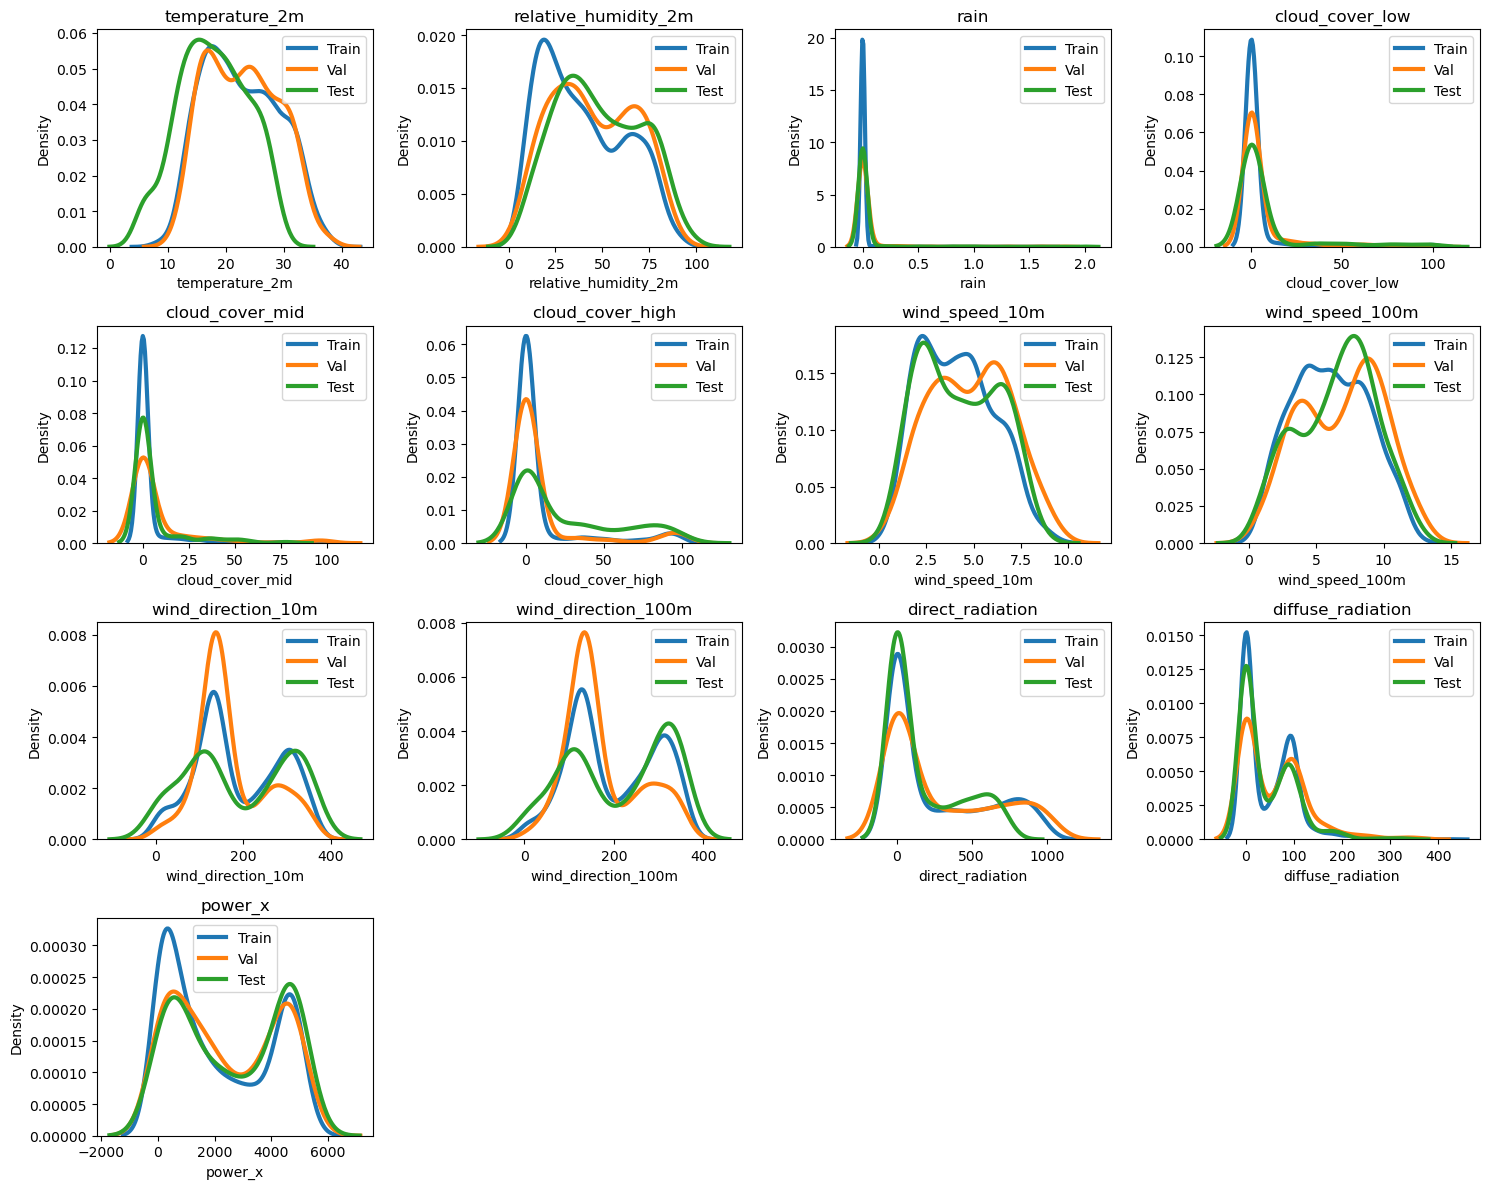

In [22]:
# Define the split indices
n = len(df)
split1 = int(0.15 * n)  # First 15% for Val
split2 = int(0.85 * n)  # Last 15% for Test starts from here

# Select variables to plot
variables = [x for x in df.columns if x not in ['date', 'TOD', 'TOD_sin', 'TOD_cos']]

# Determine the grid size
n_cols = 4
n_rows = int(np.ceil(len(variables) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]

    # Plot distributions
    sns.kdeplot(df.iloc[split1:split2][var], label="Train", ax=ax, lw=3)
    sns.kdeplot(df.iloc[:split1][var], label="Val", ax=ax, lw=3)
    sns.kdeplot(df.iloc[split2:][var], label="Test", ax=ax, lw=3)

    ax.set_title(var)
    ax.legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

hmm ends is worse surprisingly, I am going to train on the ends (ie later in the year) and validate on the beginning of the dataset

In [23]:
df.to_csv('data/forecast_data_cleaned.csv')